<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Companies Bar Plot (2.20.1)

C:\Users\User\AppData\Local\Temp\ipykernel_19108\1498066002.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


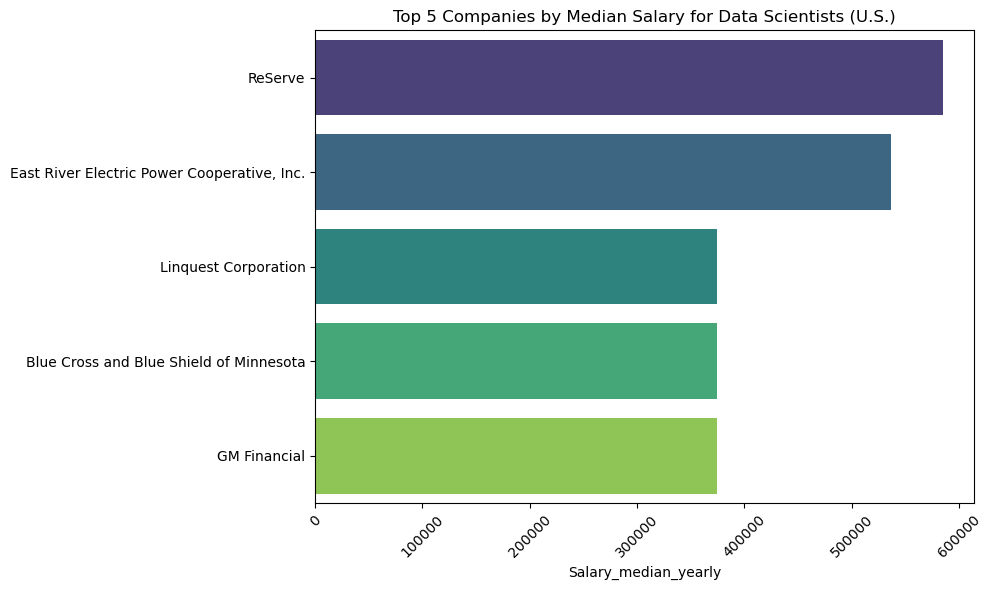

In [2]:
import seaborn as sns


df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].dropna(subset=['salary_year_avg']).copy()


median_salary = df_DS_US.groupby('company_name')['salary_year_avg'].median().reset_index()

top5 = median_salary.sort_values(by='salary_year_avg',ascending=False).head(5)


plt.figure(figsize=(10,6))
sns.barplot(
    data=top5,
    x='salary_year_avg',
    y='company_name',
    palette = 'viridis'
)

# Step 5: Customize the plot
plt.title('Top 5 Companies by Median Salary for Data Scientists (U.S.)')
plt.xlabel('Salary_median_yearly')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

## 🟨 Data Scientist Salary Histogram (2.20.2)

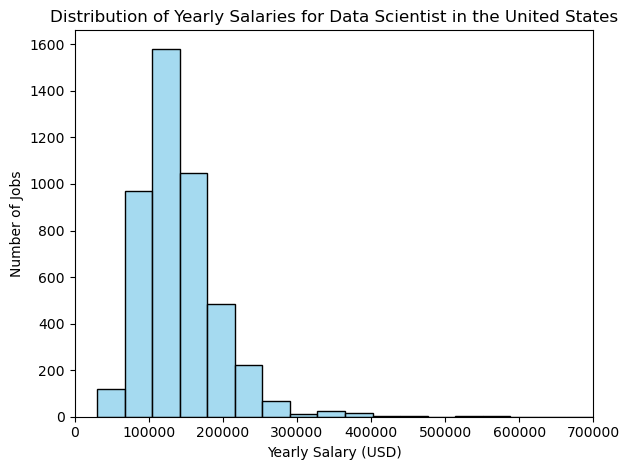

In [3]:

df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].dropna(subset=['salary_year_avg']).copy()

sns.histplot(
    data=df_DS_US,
    x='salary_year_avg',
    bins=25,
    color='skyblue',
    edgecolor='black',
)


# Step 3: Customize the plot
plt.xlim(0, 700000)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.tight_layout()
plt.show()

---

## 🟨 Data Roles Salary Box Plot (2.20.3)

C:\Users\User\AppData\Local\Temp\ipykernel_19108\1622863292.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


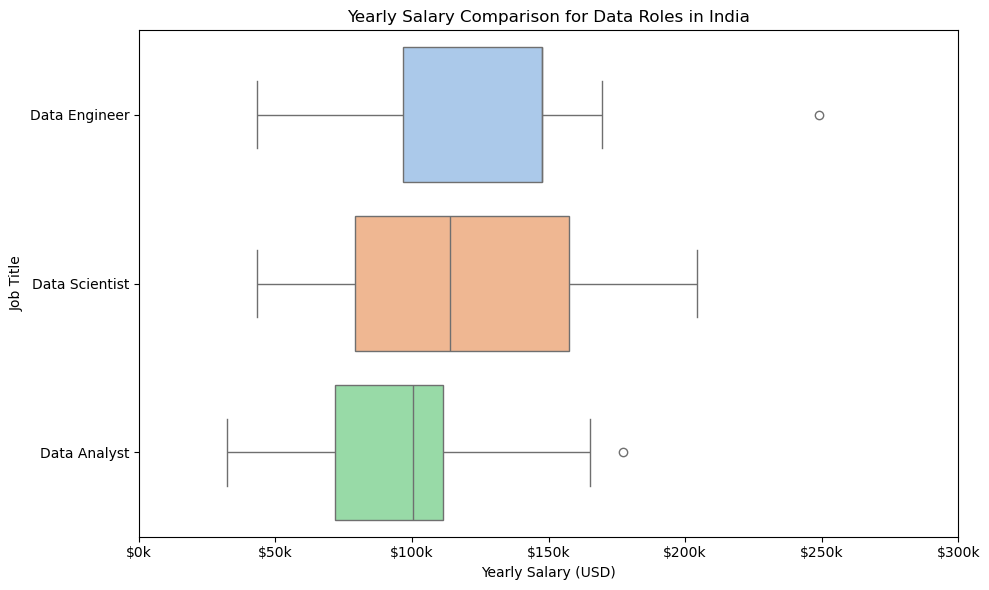

In [4]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IN = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'India')
].dropna(subset=['salary_year_avg']).copy()
         

# Step 2: Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_IN,
    x='salary_year_avg',
    y='job_title_short',
    palette='pastel',
    orient='h'
)

# Step 3: Customize axis, limits, and formatting
plt.xlim(0, 300000)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Job Title')
plt.title('Yearly Salary Comparison for Data Roles in India')

# Format x-axis as $100k, $200k, etc.
formatter = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(formatter)

# Step 4: Finalize and show
plt.tight_layout()
plt.show()
         


---

## 🟨 Salary Distribution for United States (2.20.4)

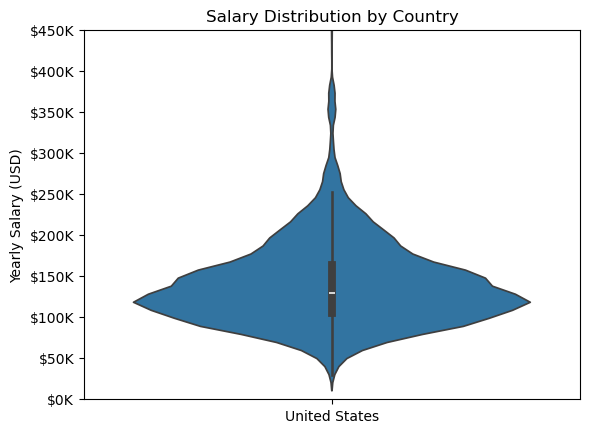

In [8]:
df_DS = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].dropna(subset=['salary_year_avg']).copy()


sns.violinplot(
    data= df_DS,
    x='job_country',
    y='salary_year_avg'
)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

---